In [5]:
import pandas as pd

adult_census = pd.read_csv("adult.csv", sep=',')

In [6]:
adult_census.head(1)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K


In [7]:
target_column = 'income'
adult_census[target_column].value_counts()


<=50K    24720
>50K      7841
Name: income, dtype: int64

In [8]:
numerical_columns = [
    "age",
    "education.num",
    "capital.gain",
    "capital.loss",
    "hours.per.week",
]
categorical_columns = [
    "workclass",
    "education",
    "marital.status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native.country",
]
all_columns = numerical_columns + categorical_columns + [target_column]

adult_census = adult_census[all_columns]

In [33]:
adult_census.head(5)

,age,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,90,9,0,4356,40,?,HS-grad,Widowed,?,Not-in-family,White,Female,United-States,<=50K
1,82,9,0,4356,18,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
2,66,10,0,4356,40,?,Some-college,Widowed,?,Unmarried,Black,Female,United-States,<=50K
3,54,4,0,3900,40,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,41,10,0,3900,40,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K


In [9]:
print(
    f"The dataset contains {adult_census.shape[0]} samples and "
    f"{adult_census.shape[1]} columns"
)

The dataset contains 32561 samples and 14 columns


In [10]:
print(f"The dataset contains {adult_census.shape[1] - 1} features.")

The dataset contains 13 features.


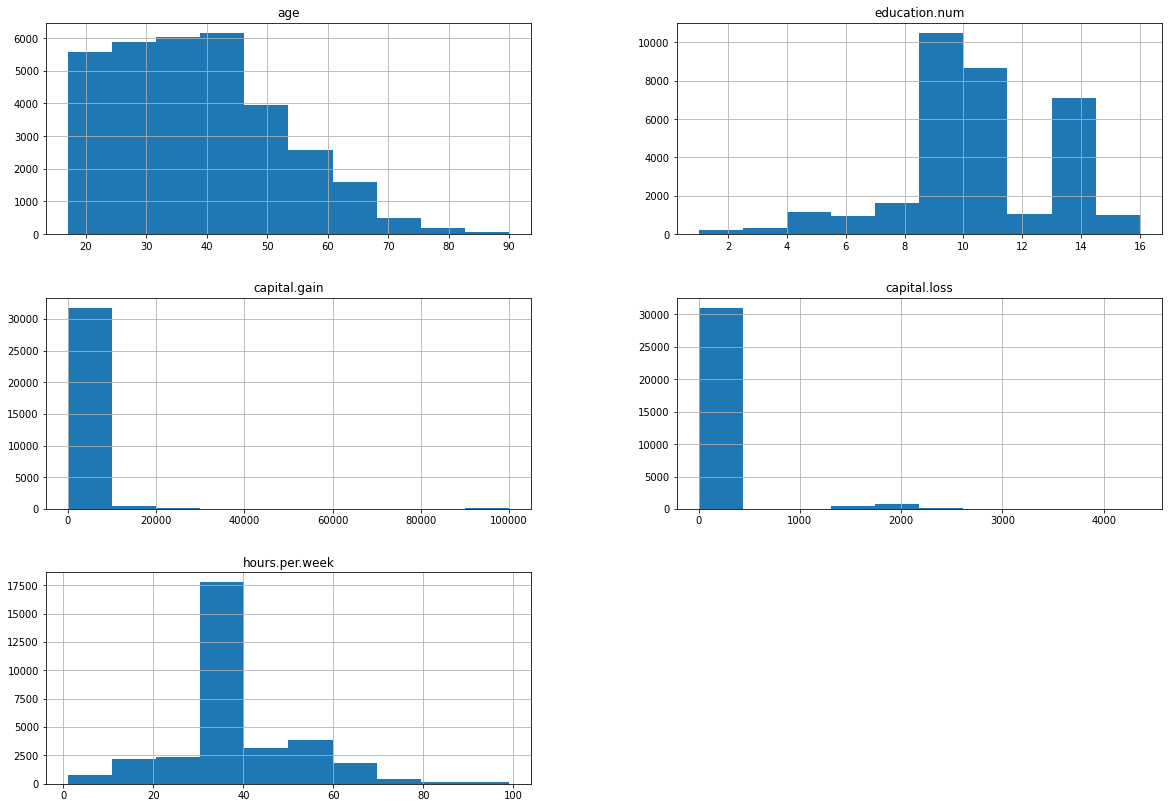

In [11]:
_ = adult_census.hist(figsize=(20, 14))

In [12]:
adult_census["sex"].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [13]:
adult_census["education"].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [14]:
pd.crosstab(index=adult_census["education"], columns=adult_census["education.num"])

education.num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
education,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,933,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,1175,0,0,0,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,433,0,0,0,0,0,0,0,0
1st-4th,0,168,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,333,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,646,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,514,0,0,0,0,0,0,0,0,0,0,0
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,1067,0,0,0,0
Assoc-voc,0,0,0,0,0,0,0,0,0,0,1382,0,0,0,0,0


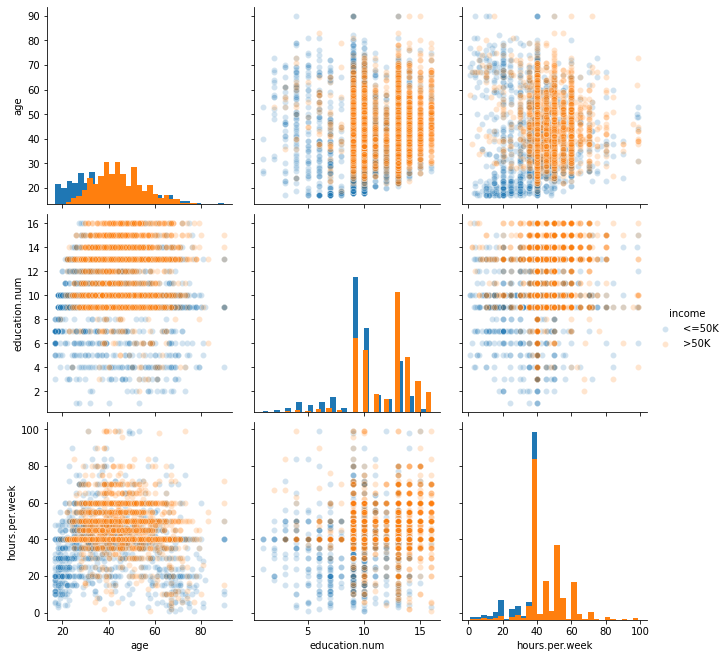

In [15]:
import seaborn as sns

# dibujaremos un subset con 5000 muestras del data.set
n_samples_to_plot = 5000
columns = ['age','education.num', 'hours.per.week']
_ = sns.pairplot(
    data=adult_census[:n_samples_to_plot],
    vars=columns,
    hue=target_column,
    plot_kws={'alpha': 0.2},
    height=3,
    diag_kind='hist',
    diag_kws={'bins':30},
)

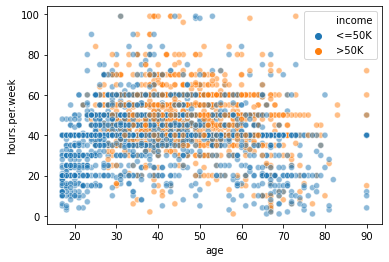

In [16]:
_ = sns.scatterplot(
    x = 'age',
    y = 'hours.per.week',
    data=adult_census[:n_samples_to_plot],
    hue=target_column,
    alpha=0.5,
)

In [17]:
import matplotlib.pyplot as plt

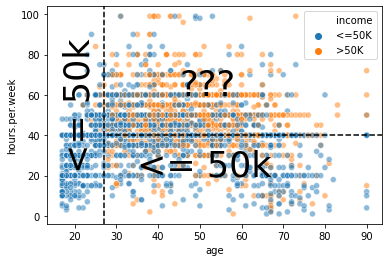

In [18]:
from turtle import color

from matplotlib.lines import lineStyles
from matplotlib.pyplot import annotate


ax = sns.scatterplot(
    x = 'age',
    y = 'hours.per.week',
    data=adult_census[:n_samples_to_plot],
    hue=target_column,
    alpha=0.5,
)

age_limit = 27
plt.axvline(x=age_limit, ymin=0, ymax=1, color='black', linestyle='--')

hours_per_week_limit = 40
plt.axhline(y=hours_per_week_limit, xmin=0.18, xmax=1,color='black', linestyle='--')

plt.annotate('<= 50k', (17,25), rotation=90, fontsize = 35)
plt.annotate('<= 50k', (35,20), fontsize = 35)
_ = plt.annotate('???', (45,60), fontsize= 35)

Tenga en cuenta que el aprendizaje automático se usa a menudo cuando la creación de reglas a mano no es sencilla. Por ejemplo, porque estamos en una dimensión alta (muchas características en una tabla) o porque no existen reglas simples y obvias que separen las dos clases como en la región superior derecha de la gráfica anterior.

Ejercicio 2 con las variables numericas

In [34]:
adult_census_2 = ["age",
    "capital.gain",
    "capital.loss",
    "hours.per.week"]

In [35]:
al_columns = adult_census_2 + [target_column]

adult_census_3 = adult_census[al_columns]

In [36]:
adult_census_3.head(5)

,age,capital.gain,capital.loss,hours.per.week,income
0,90,0,4356,40,<=50K
1,82,0,4356,18,<=50K
2,66,0,4356,40,<=50K
3,54,0,3900,40,<=50K
4,41,0,3900,40,<=50K


Vemos que este archivo CSV contiene toda la información: el objetivo que nos gustaría predecir (es decir, "class") y los datos que queremos usar para entrenar nuestro modelo predictivo (es decir, las columnas restantes). El primer paso es separar las columnas para obtener de un lado el objetivo y del otro lado los datos.

In [38]:
target_name = "class"
target = adult_census_3['income']
target

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32556    <=50K
32557    <=50K
32558     >50K
32559    <=50K
32560    <=50K
Name: income, Length: 32561, dtype: object

In [39]:
data = adult_census_3.drop(columns=['income', ])
data.head()

,age,capital.gain,capital.loss,hours.per.week
0,90,0,4356,40
1,82,0,4356,18
2,66,0,4356,40
3,54,0,3900,40
4,41,0,3900,40


Ahora podemos detenernos en las variables, también denominadas características, que usaremos para construir nuestro modelo predictivo. Además, también podemos comprobar cuántas muestras hay disponibles en nuestro conjunto de datos

In [40]:
data.columns

Index(['age', 'capital.gain', 'capital.loss', 'hours.per.week'], dtype='object')

In [42]:
print(f'the dataset contains {data.shape[0]} samples and '
    f'{data.shape[1]} features')

the dataset contains 32561 samples and 4 features


Construiremos un modelo de clasificación utilizando la estrategia "K-vecinos más cercanos". Para predecir el objetivo de una nueva muestra, k-vecinos más cercanos tiene en cuenta sus kmuestras más cercanas en el conjunto de entrenamiento y predice el objetivo mayoritario de estas muestras.

**Precaución**

Usamos K-vecinos más cercanos aquí. Sin embargo, tenga en cuenta que rara vez es útil en la práctica. Lo usamos porque es un algoritmo intuitivo. En el próximo cuaderno, presentaremos mejores modelos.

In [43]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
_ = model.fit(data, target)

In [44]:
target_predicted = model.predict(data)

Para predecir, un modelo utiliza una función de predicción que utilizará los datos de entrada junto con los estados del modelo. En cuanto al algoritmo de aprendizaje y los estados del modelo, la función de predicción es específica para cada tipo de modelo.

In [45]:
target_predicted[:5]

array(['<=50K', '<=50K', '<=50K', '<=50K', '<=50K'], dtype=object)

In [46]:
target[:5] == target_predicted[:5]

0    True
1    True
2    True
3    True
4    True
Name: income, dtype: bool

In [47]:
print(f'Number of correct prediction: '
    f'{(target[:5] == target_predicted[:5]).sum()} / 5')

Number of correct prediction: 5 / 5


In [48]:
(target == target_predicted).mean()

0.805994901876478

Este resultado significa que el modelo hace predicciones corrcetas para aproximadamente 80 muestras de 100.

**Ejercicio M2**

In [76]:
adult_census_3

,age,capital.gain,capital.loss,hours.per.week,income
0,90,0,4356,40,<=50K
1,82,0,4356,18,<=50K
2,66,0,4356,40,<=50K
3,54,0,3900,40,<=50K
4,41,0,3900,40,<=50K
...,...,...,...,...,...
32556,22,0,0,40,<=50K
32557,27,0,0,38,<=50K
32558,40,0,0,40,>50K
32559,58,0,0,40,<=50K


In [77]:
data_1 = adult_census_3.drop(columns= 'income')
target_1 = adult_census_3['income']

In [78]:
from sklearn.neighbors import KNeighborsClassifier

In [79]:
model = KNeighborsClassifier(n_neighbors=50)

In [80]:
model.fit(data_1, target_1)

KNeighborsClassifier(n_neighbors=50)

In [85]:
primer_valor = data_1.iloc[:10]
primer_prediccion = model.predict(primer_valor)
primer_prediccion

array(['>50K', '>50K', '>50K', '>50K', '>50K', '>50K', '>50K', '>50K',
       '>50K', '>50K'], dtype=object)

In [86]:
primer_target = target_1.iloc[:10]
primer_target

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
5    <=50K
6    <=50K
7     >50K
8    <=50K
9     >50K
Name: income, dtype: object

In [89]:
numero_correcto_predicciones = (
    primer_prediccion == primer_target).sum()
numero_de_predicciones = len(primer_prediccion)
print(
    f'{numero_correcto_predicciones} / {numero_de_predicciones}'
    'de predicciones correctas'
)

2 / 10de predicciones correctas


In [90]:
model.score(data_1, target_1)

0.8274623015263659